In [1]:
import numpy as np
import pylab as mplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
size_ratio_grid = np.logspace(np.log10(0.5), np.log10(6), 21)
s2n_grid = np.logspace(np.log10(10), np.log10(400), 21)
size_ratio_grid2 = [str(xx)[:4] for xx in size_ratio_grid]
s2n_grid2 = [str(xx)[:4] for xx in s2n_grid]

In [3]:
counts = np.zeros((20,20))
sigma_e2 = np.zeros((20,20))
sigma_e2_m = np.zeros((20,20))
R11 = np.zeros((20,20))
R11s = np.zeros((20,20))
R22 = np.zeros((20,20))
R22s = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        X = np.loadtxt('/project/chihway/chihway/midway2/shearcat/code/response_s2n_size/response_'+str(i)+'_'+str(j)+'.txt')
        
        counts[i][j] = X[0]
        R11[i][j] = X[1]
        R11s[i][j] = X[2]
        R22[i][j] = X[3]
        R22s[i][j] = X[4]
        sigma_e2[i][j] = X[5]
        sigma_e2_m[i][j] = X[6]  

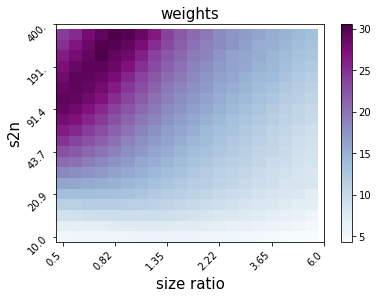

In [4]:
R_gamma = (R11+R22)/2
sigma_e_all = (sigma_e2*counts).copy()
ww = (1./(sigma_e_all*R_gamma**(-2))).T
mplot.imshow(ww, cmap='BuPu', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4], size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4], s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('weights', fontsize=15)
mplot.xlabel('size ratio', fontsize=15)
mplot.ylabel('s2n', fontsize=15)
mplot.colorbar()

mplot.savefig('weights.pdf', bbox_inches='tight')

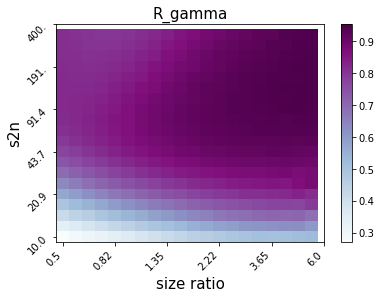

In [6]:
mplot.imshow(R_gamma.T, cmap='BuPu', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4], size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4], s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('R_gamma', fontsize=15)
mplot.xlabel('size ratio', fontsize=15)
mplot.ylabel('s2n', fontsize=15)
mplot.colorbar()

mplot.savefig('Rgamma.pdf', bbox_inches='tight')

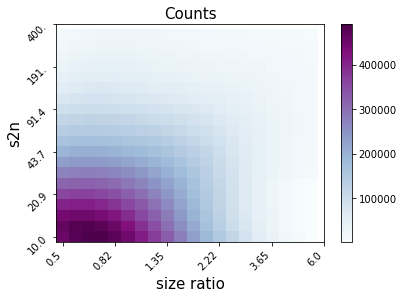

In [7]:
mplot.imshow(counts.T, cmap='BuPu', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4], size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4], s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('Counts', fontsize=15)
mplot.xlabel('size ratio', fontsize=15)
mplot.ylabel('s2n', fontsize=15)
mplot.colorbar()

mplot.savefig('counts.pdf', bbox_inches='tight')

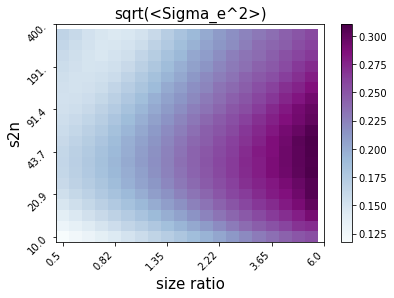

In [10]:
mplot.imshow((sigma_e_all.T)**0.5, cmap='BuPu', origin='lower', aspect='auto')
mplot.xticks(np.arange(21)[::4], size_ratio_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.yticks(np.arange(21)[::4], s2n_grid2[::4], rotation=45, fontsize='10', horizontalalignment='right')
mplot.title('sqrt(<Sigma_e^2>)', fontsize=15)
mplot.xlabel('size ratio', fontsize=15)
mplot.ylabel('s2n', fontsize=15)
mplot.colorbar()

mplot.savefig('sigmae2.pdf', bbox_inches='tight')